# 一元线性回归

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = [['BSPI ', '2017/10/8', 0.258794791, 0.541933957, 0.447076618,
        0.16755432, 0.286941159, 0.49158207200000004, 0.784914308,
        0.00922647, 501.17665300000004, 528.327054],
       ['BSPI ', '2017/10/9', 0.224347447, 0.159889751,
        0.44689776200000003, 0.710730319, 0.644258725,
        0.34984323700000003, 0.154940881, 0.288080608, 516.9591015,
        504.6073924],
       ['BSPI ', '2017/10/10', 0.42153764299999996, 0.33957535299999997,
        0.103544165, 0.6851178640000001, 0.481597922,
        0.44666106299999997, 0.39464121700000004, 0.481013821,
        505.8568791999999, 529.4936396],
       ['BSPI ', '2017/10/11', 0.9097169009999999, 0.15996496699999999,
        0.962647425, 0.634049348, 0.635355525, 0.20724821300000001,
        0.37679995299999997, 0.267743688, 522.4202389, 515.7253737],
       ['BSPI ', '2017/10/12', 0.180368912, 0.586495785, 0.786758396,
        0.535619689, 0.034125906, 0.254857807, 0.227854576,
        0.08107589400000001, 507.2141244, 535.2681311000001],
       ['BSPI ', '2017/10/13', 0.385514769, 0.893826406, 0.45165251,
        0.89295489, 0.012863655, 0.40017216299999997, 0.178884828,
        0.636700131, 526.9329466, 532.6595409],
       ['BSPI ', '2017/10/14', 0.348606153, 0.247036487,
        0.9636722790000001, 0.5790418310000001, 0.10241139199999999,
        0.462438924, 0.487144564, 0.956052259, 535.5097843, 503.4834477],
       ['BSPI ', '2017/10/15', 0.71674749, 0.715614162, 0.293087926,
        0.553624845, 0.436491164, 0.056554287, 0.592343902, 0.366735264,
        525.6594792, 501.17665300000004],
       ['BSPI ', '2017/10/16', 0.82927837, 0.183019745, 0.790087711,
        0.761302928, 0.347872325, 0.435350966, 0.064931477, 0.091170553,
        531.768567, 516.9591015],
       ['BSPI ', '2017/10/17', 0.550255309, 0.663312975, 0.72577517,
        0.393926554, 0.553572046, 0.336135896, 0.27378790399999997,
        0.010676841999999999, 520.5519874, 505.8568791999999],
       ['BSPI ', '2017/10/18', 0.85388901, 0.371513131,
        0.7526710740000001, 0.159240405, 0.087605675,
        0.20880591399999998, 0.329387444, 0.6318043760000001,
        533.4848626, 522.4202389],
       ['BSPI ', '2017/10/19', 0.446732886, 0.9925719209999999,
        0.50107654, 0.739762782, 0.489800977, 0.506350572, 0.046995449,
        0.21853437899999997, 513.8645728, 507.2141244],
       ['BSPI ', '2017/10/20', 0.747990701, 0.253585777, 0.687134837,
        0.669014915, 0.926013359, 0.7952470709999999, 0.8143479579999999,
        0.170939134, 499.812065, 526.9329466],
       ['BSPI ', '2017/10/21', 0.7485204759999999, 0.718848652,
        0.60296962, 0.038134076, 0.434753409, 0.565341865, 0.41884276,
        0.536503802, 525.8347609, 535.5097843],
       ['BSPI ', '2017/10/22', 0.553779971, 0.997731664, 0.215011218,
        0.556536728, 0.177844069, 0.36618757, 0.665416769, 0.635719418,
        516.8566394999999, 525.6594792],
       ['BSPI ', '2017/10/23', 0.390227712, 0.7732653209999999,
        0.19271657, 0.155743119, 0.675576803, 0.129773719, 0.557650491,
        0.766503114, 537.889325, 531.768567],
       ['BSPI ', '2017/10/24', 0.519735576, 0.269845428, 0.05971938,
        0.109824483, 0.6138930229999999, 0.661908801, 0.61697169,
        0.061363689000000006, 510.1249022, 520.5519874],
       ['BSPI ', '2017/10/25', 0.638961192, 0.557175739,
        0.47324974700000005, 0.324989997, 0.346374744, 0.26758225,
        0.29179534, 0.5858655660000001, 515.1188266, 533.4848626],
       ['BSPI ', '2017/10/26', 0.268229713, 0.695393843,
        0.10230529099999999, 0.84081223, 0.495623273, 0.91279571,
        0.759904907, 0.124567825, 529.2700956, 513.8645728],
       ['BSPI ', '2017/10/27', 0.487974125, 0.36731996, 0.450206668,
        0.120701023, 0.648399959, 0.021068909, 0.884732023, 0.22342043,
        518.9593521, 499.812065],
       ['BSPI ', '2017/10/28', 0.16195221199999998, 0.092878343,
        0.036647501, 0.7112585990000001, 0.943083995, 0.660109599,
        0.478453009, 0.993854455, 519.7257917, 525.8347609],
       ['BSPI ', '2017/10/29', 0.7015782970000001, 0.670538217,
        0.38535158399999997, 0.202134005, 0.411612032,
        0.48173590299999997, 0.345791788, 0.19824143100000002,
        525.2881194, 516.8566394999999],
       ['BSPI ', '2017/10/30', 0.1031952, 0.29762357100000003,
        0.614584329, 0.53377937, 0.816438338, 0.6926905409999999,
        0.8741194179999999, 0.48741614, 511.2681897, 537.889325],
       ['BSPI ', '2017/10/31', 0.010877636999999999, 0.17279439,
        0.479772696, 0.4929634, 0.589670814, 0.044080945, 0.143838254,
        0.22006739, 497.92432249999996, 510.1249022],
       ['BSPI ', '2017/11/1', 0.627255875, 0.517468105, 0.393487642,
        0.71952623, 0.030300393, 0.721754447, 0.994098809, 0.050383505,
        519.6323097, 515.1188266],
       ['BSPI ', '2017/11/2', 0.473026426, 0.913001825,
        0.24568528899999997, 0.490608958, 0.545286465, 0.445116657,
        0.7252768690000001, 0.07306616099999999, 512.1485025000001,
        529.2700956],
       ['BSPI ', '2017/11/3', 0.447183063, 0.21457690199999999,
        0.527869651, 0.42300459799999995, 0.893193565, 0.537026122,
        0.975401512, 0.160936871, 523.1452573, 518.9593521],
       ['BSPI ', '2017/11/4', 0.752054117, 0.091999513, 0.704637197,
        0.503353591, 0.638868209, 0.9237592659999999,
        0.23281993899999998, 0.921168358, 499.6888677, 519.7257917],
       ['BSPI ', '2017/11/5', 0.057430537999999996, 0.077658423,
        0.311356995, 0.946268842, 0.6784140809999999, 0.215553678,
        0.8541197429999999, 0.938236609, 516.7807146, 525.2881194],
       ['BSPI ', '2017/11/6', 0.852970821, 0.276614994,
        0.8333344420000001, 0.17735267100000002, 0.706020632,
        0.778505265, 0.607074346, 0.936957935, 505.55913430000004,
        511.2681897],
       ['BSPI ', '2017/11/7', 0.586126512, 0.112629713, 0.654465882,
        0.9898464029999999, 0.079916611, 0.43712193, 0.912500306,
        0.388858022, 500.22130639999995, 497.92432249999996],
       ['BSPI ', '2017/11/8', 0.7588571140000001, 0.58968812,
        0.10852305699999999, 0.344001664, 0.37759036,
        0.35603670200000004, 0.39640609200000004, 0.270887406,
        520.599218, 519.6323097],
       ['BSPI ', '2017/11/9', 0.11923157, 0.35684723399999996,
        0.12522213199999999, 0.099160082, 0.992454443, 0.429995003,
        0.25787413600000003, 0.225852238, 536.0891554, 512.1485025000001],
       ['BSPI ', '2017/11/10', 0.082529735, 0.26197772199999997,
        0.42132221200000003, 0.075807141, 0.48481621, 0.7554422,
        0.310518594, 0.197244723, 514.1286991999999, 523.1452573],
       ['BSPI ', '2017/11/11', 0.8735062090000001, 0.288796275,
        0.992885783, 0.7263295679999999, 0.308351986, 0.2793389,
        0.08207878, 0.8901900509999999, 511.0978731000001, 499.6888677],
       ['BSPI ', '2017/11/12', 0.759451763, 0.468852085,
        0.7305229679999999, 0.41888922799999995, 0.69767251, 0.120825104,
        0.6963985840000001, 0.921977906, 524.4907996999999, 516.7807146],
       ['BSPI ', '2017/11/13', 0.384820004, 0.284851081, 0.162441012,
        0.138816813, 0.903928002, 0.924199841, 0.053374356, 0.648651876,
        521.5232143999999, 505.55913430000004],
       ['BSPI ', '2017/11/14', 0.8916628740000001, 0.304665326,
        0.040681993, 0.32213327199999997, 0.75429426, 0.9134762190000001,
        0.474948187, 0.7167695479999999, 514.2936971, 500.22130639999995],
       ['BSPI ', '2017/11/15', 0.246920265, 0.235126014, 0.589233744,
        0.04089193, 0.29484851100000004, 0.749910436, 0.9358836079999999,
        0.891502529, 511.2757131, 520.599218],
       ['BSPI ', '2017/11/16', 0.688757689, 0.448872861, 0.508243629,
        0.284858736, 0.5999772760000001, 0.73494609, 0.128371,
        0.43383868700000006, 526.4046445, 536.0891554],
       ['BSPI ', '2017/11/17', 0.51685905, 0.23618961100000002,
        0.09162533099999999, 0.5579006, 0.06271671200000001, 0.847584711,
        0.164395552, 0.847505345, 520.2433579, 514.1286991999999],
       ['BSPI ', '2017/11/18', 0.568805745, 0.574572416, 0.593791642,
        0.278763469, 0.7644233490000001, 0.750261706, 0.354070272,
        0.04963712, 492.822063, 511.0978731000001],
       ['BSPI ', '2017/11/19', 0.8835072279999999, 0.988767024,
        0.83889492, 0.170319975, 0.437933855, 0.155751163,
        0.41697001200000006, 0.948229074, 488.3920205, 524.4907996999999],
       ['BSPI ', '2017/11/20', 0.313785145, 0.326784045, 0.716745303,
        0.123593849, 0.580419303, 0.6614087820000001, 0.766702702,
        0.8500307090000001, 488.07982289999995, 521.5232143999999],
       ['BSPI ', '2017/11/21', 0.905684723, 0.432193924, 0.961937649,
        0.41424374799999997, 0.860169865, 0.6206787229999999, 0.58862654,
        0.6338495479999999, 498.7341149, 514.2936971],
       ['BSPI ', '2017/11/22', 0.972047772, 0.434862025, 0.282330015,
        0.322566869, 0.369799395, 0.228778184, 0.94486154,
        0.061029479000000005, 507.97377800000004, 511.2757131]]

In [3]:
coal_price = pd.DataFrame(data,columns= ['指标目标', '日期', '生产成本', '煤炭产能', '煤炭消费', '替代能源', '库存变化', '煤炭进出口','国际煤价因素', '政治因素', '价格', '七日价格'])
coal_price.head()

,指标目标,日期,生产成本,煤炭产能,煤炭消费,替代能源,库存变化,煤炭进出口,国际煤价因素,政治因素,价格,七日价格
0,BSPI,2017/10/8,0.258795,0.541934,0.447077,0.167554,0.286941,0.491582,0.784914,0.009226,501.176653,528.327054
1,BSPI,2017/10/9,0.224347,0.159890,0.446898,0.710730,0.644259,0.349843,0.154941,0.288081,516.959101,504.607392
2,BSPI,2017/10/10,0.421538,0.339575,0.103544,0.685118,0.481598,0.446661,0.394641,0.481014,505.856879,529.493640
3,BSPI,2017/10/11,0.909717,0.159965,0.962647,0.634049,0.635356,0.207248,0.376800,0.267744,522.420239,515.725374
4,BSPI,2017/10/12,0.180369,0.586496,0.786758,0.535620,0.034126,0.254858,0.227855,0.081076,507.214124,535.268131


In [4]:
from IPython.display import HTML, display
import statsmodels.api as sm
from statsmodels.formula.api import ols

coal_model = ols("价格 ~ 库存变化", data=coal_price).fit()
# summarize our model
coal_model.summary = coal_model.summary()
coal_model.summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     价格   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.4675
Date:                Tue, 27 Nov 2018   Prob (F-statistic):              0.498
Time:                        13:43:42   Log-Likelihood:                -180.44
No. Observations:                  46   AIC:                             364.9
Df Residuals:                      44   BIC:                             368.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.6693      3.953    130.951      0.000     509.702     525.636
库存变化          -4.7301      6.918     -0.684      0.498     -18.672       9.212
==============================================================================
Omnibus:                        0.966   Durbin-Watson:                   1.390
Prob(Omnibus):                  0.617   Jarque-Bera (JB):                1.028
Skew:                          -0.283   Prob(JB):                        0.598
Kurtosis:                       2.535   Cond. No.                         4.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R-squared:R^2衡量的是回归方程整体的拟合度，是表达因变量与所有自变量之间的总体关系。R^2等于回归平方和在总平方和中所占的比率，即回归方程所能解释的因变量变异性的百分比（表明房价95%可以通过我们的预测变量的解释）
- correlation coefficient (coef) ：相关系数是在自变量变化一个单位所产生的因变量的变化，所有其他变量保持不变。在我们的模型中，在库存变化增加一个单位，可减少-1.2884的价格。根据我们的假设，库存的增加似乎会降低价格。
-  p-value：p值就是假设的否命题 成立的概率，因为非常小，所以否命题为假，即原命题为真
- 置信区间是我们的系数可能下降的一个范围。我们可以95%确信total_unemployed系数将在我们的置信区间，[ -14.657 12.080]。

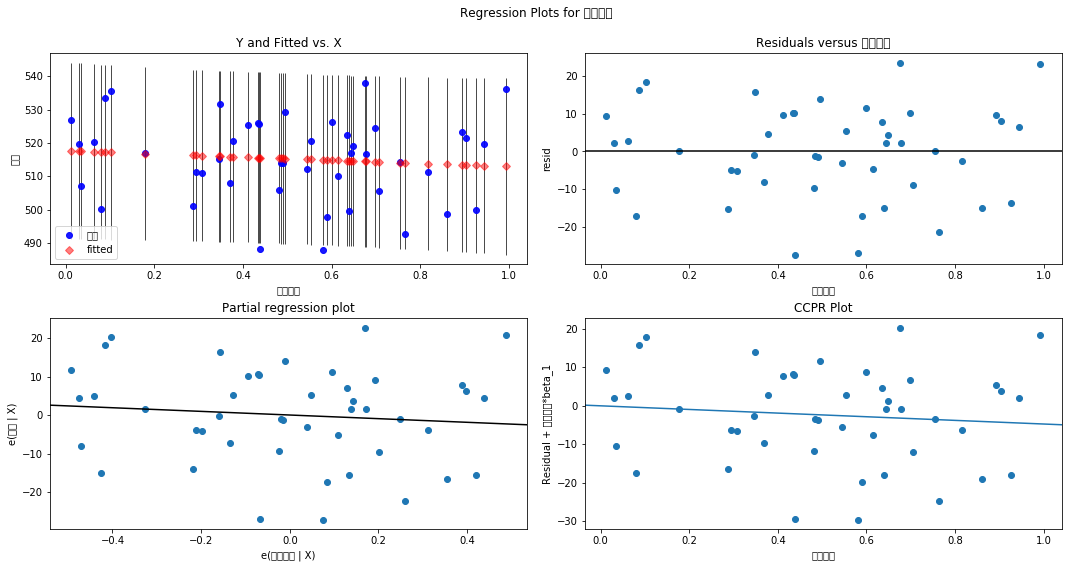

In [5]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# use figsize to adjust size, and pass in to plot_regress_exog
fig = plt.figure(figsize=(15,8))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(coal_model, "库存变化", fig=fig)

# 多元线性回归

In [6]:
from IPython.display import HTML, display
import statsmodels.api as sm
from statsmodels.formula.api import ols

coal_model = ols("""价格 ~ 生产成本 + 煤炭产能+煤炭消费+替代能源+库存变化+煤炭进出口+国际煤价因素+政治因素""", data=coal_price).fit()
coal_model_summary = coal_model.summary()
HTML(
    coal_model_summary\
        .as_html()\
        .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;">  Adj. R-squared:    </th>')\
        .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')\
        .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')\
        .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')\
        .replace('<th>[95.0% Conf. Int.]</th>', '<th style="background-color:#ff9896;">[95.0% Conf. Int.]</th>')
)

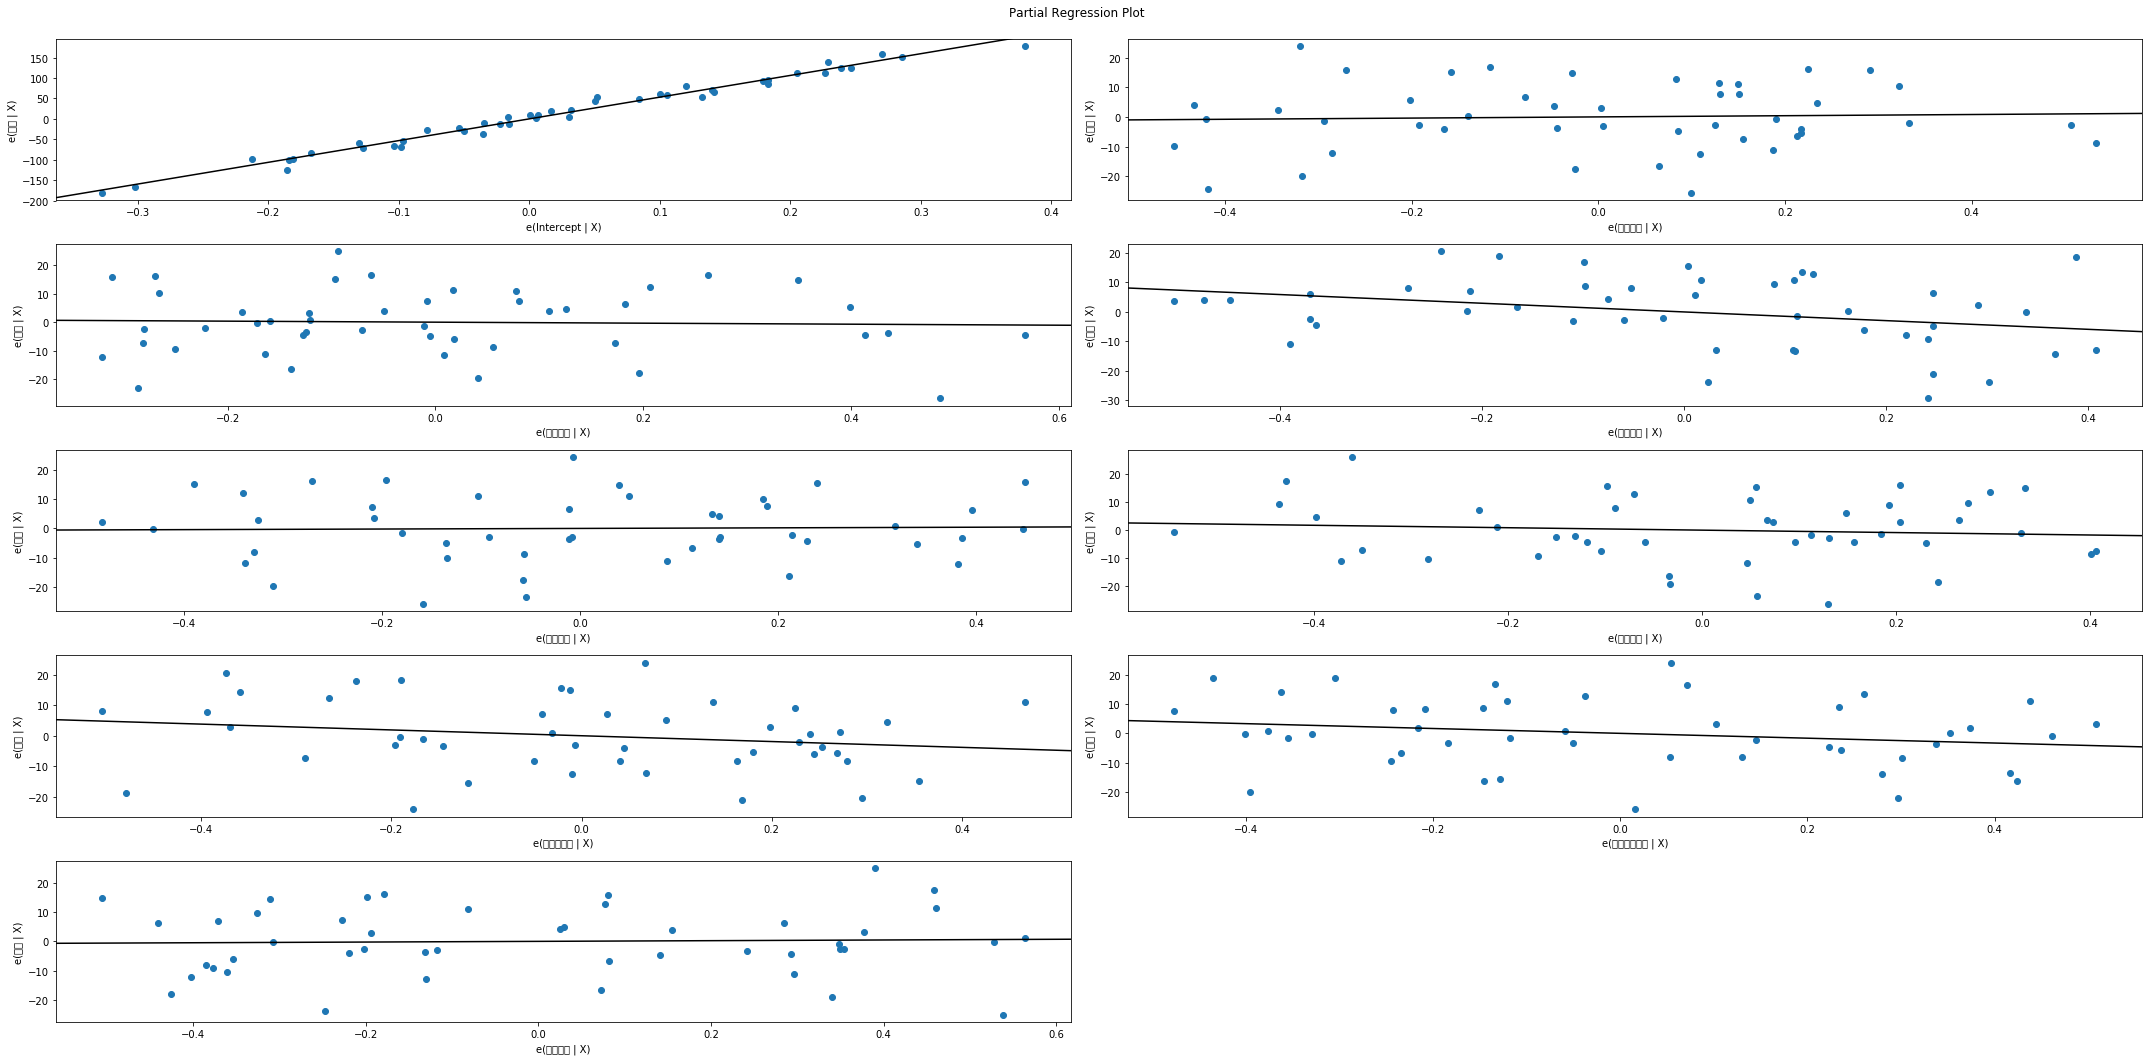

In [7]:
# this produces our six partial regression plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(30,15))
fig = sm.graphics.plot_partregress_grid(coal_model, fig=fig)